# Video game sales


Mount the drive folders to enable us to work with the data directly from the google drive shared folder.

Navigate to the shared folder and use pandas to import all the needed data. The data is in a CSV format (Comma Separated Values).

In [1]:
#IMPORTS
import pandas as pd
import seaborn as sns
import numpy as np
import sys 
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure, plot, title, xlabel, ylabel, show, legend
from scipy.linalg import svd
from sklearn import preprocessing
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder

In [2]:
from google.colab import drive
drive.mount('/content/drive')
#comment if not being run in colab

Mounted at /content/drive


In [3]:
%cd /content/drive/MyDrive/INTRO\ DATA\ MINING/
%ls
data_csv = pd.read_csv("Video_Games_Sales_as_at_22_Dec_2016.csv")

/content/drive/.shortcut-targets-by-id/1y22z3-6z1uAkyXOu7VSZEuBCOb3R_Gw4/INTRO DATA MINING
 02450_exam-master.zip
 ANN_VideoGames_sales_report2.ipynb
'K of One lambda testVideoGames_sales_report2.ipynb'
 Others/
'Project 2 Report.gdoc'
 Test_classification_tasks_VideoGames_sales_report2.ipynb
 Test_linear_regression_VideoGames_sales_report2.ipynb
 Test_logistic_regression_VideoGames_sales_report2.ipynb
'Test of get_dummies of VideoGames_sales_report2.ipynb'
 Test_regression_statistics_VideoGames_sales_report2.ipynb
 toolbox_02450/
 Video_Games_Sales_as_at_22_Dec_2016.csv
 Video_Games_Sales_as_at_22_Dec_2016.gsheet
 VideoGames_sales_report2.ipynb
 Weights.gsheet


In [4]:
#check missing values
data_csv.isnull().sum()

Name                  2
Platform              0
Year_of_Release     269
Genre                 2
Publisher            54
NA_Sales              0
EU_Sales              0
JP_Sales              0
Other_Sales           0
Global_Sales          0
Critic_Score       8582
Critic_Count       8582
User_Score         9129
User_Count         9129
Developer          6623
Rating             6769
dtype: int64

#Preprocessing


First of all we will use the method "describe()" to get the name of all the columns, together with some samples of each dataset.


In [5]:
print(data_csv.describe())
data_csv.head()

       Year_of_Release      NA_Sales      EU_Sales      JP_Sales  \
count     16450.000000  16719.000000  16719.000000  16719.000000   
mean       2006.487356      0.263330      0.145025      0.077602   
std           5.878995      0.813514      0.503283      0.308818   
min        1980.000000      0.000000      0.000000      0.000000   
25%        2003.000000      0.000000      0.000000      0.000000   
50%        2007.000000      0.080000      0.020000      0.000000   
75%        2010.000000      0.240000      0.110000      0.040000   
max        2020.000000     41.360000     28.960000     10.220000   

        Other_Sales  Global_Sales  Critic_Score  Critic_Count   User_Score  \
count  16719.000000  16719.000000   8137.000000   8137.000000  7590.000000   
mean       0.047332      0.533543     68.967679     26.360821     7.125046   
std        0.186710      1.547935     13.938165     18.980495     1.500006   
min        0.000000      0.010000     13.000000      3.000000     0.000000 

,Name,Platform,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count,Developer,Rating
0,Wii Sports,Wii,2006.0,Sports,Nintendo,41.36,28.96,3.77,8.45,82.53,76.0,51.0,8.0,322.0,Nintendo,E
1,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24,NaN,NaN,NaN,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.68,12.76,3.79,3.29,35.52,82.0,73.0,8.3,709.0,Nintendo,E
3,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.61,10.93,3.28,2.95,32.77,80.0,73.0,8.0,192.0,Nintendo,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37,NaN,NaN,NaN,NaN,NaN,NaN


We will drop the Name, Critic count and User count columns since we believe they do not add any relevant information in our dataset. Finally, we delete all the rows that contain a NULL value since it is uncomplete data.

In [6]:
data_csv = data_csv.drop(columns=['Name'])
data_csv = data_csv.drop(columns=['Critic_Count'])
data_csv = data_csv.drop(columns=['User_Count'])
data_csv = data_csv.drop(columns=['Global_Sales'])
data_csv = data_csv.drop(columns=['Publisher'])
data_csv = data_csv.drop(columns=['Developer'])
data_csv['User_Score'] = data_csv['User_Score'].astype(float) #make the user score float64
data_csv['EU_Sales'] = data_csv['EU_Sales'].mul(1000)
data_csv['Other_Sales'] = data_csv['Other_Sales'].mul(1000)
data_csv['JP_Sales'] = data_csv['JP_Sales'].mul(1000)
data_csv['NA_Sales'] = data_csv['NA_Sales'].mul(1000)
data_csv['User_Score'] = data_csv['User_Score'].mul(10)
data_csv = data_csv.dropna()
data_csv.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6826 entries, 0 to 16706
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Platform         6826 non-null   object 
 1   Year_of_Release  6826 non-null   float64
 2   Genre            6826 non-null   object 
 3   NA_Sales         6826 non-null   float64
 4   EU_Sales         6826 non-null   float64
 5   JP_Sales         6826 non-null   float64
 6   Other_Sales      6826 non-null   float64
 7   Critic_Score     6826 non-null   float64
 8   User_Score       6826 non-null   float64
 9   Rating           6826 non-null   object 
dtypes: float64(7), object(3)
memory usage: 586.6+ KB


We will start the encoding of the variables that need it, which are the following:

1. Platform → Label Encoder
2. Genre → Label Encoder
5. Rating → Label Encoder

In [7]:
label_encoder = preprocessing.LabelEncoder()
Ordinal_encoder = preprocessing.OrdinalEncoder()

# data_csv['Platform'] = label_encoder.fit_transform(data_csv['Platform']) #encoding 'Platform' attribute
# data_csv['Genre'] = label_encoder.fit_transform(data_csv['Genre']) #encoding 'Genre' attribute
# data_csv['Rating'] = label_encoder.fit_transform(data_csv['Rating']) #encoding 'Rating' attribute

three_hot = pd.get_dummies(data_csv['Rating'])
#Drop column B as it is now encoded
data_csv = data_csv.drop('Rating',axis = 1)
#Join the encoded data_csv
data_csv = data_csv.join(three_hot)


one_hot = pd.get_dummies(data_csv['Platform'])
#Drop column B as it is now encoded
data_csv = data_csv.drop('Platform',axis = 1)
#Join the encoded data_csv
data_csv = data_csv.join(one_hot)


two_hot = pd.get_dummies(data_csv['Genre'])
#Drop column B as it is now encoded
data_csv = data_csv.drop('Genre',axis = 1)
#Join the encoded data_csv
data_csv = data_csv.join(two_hot)

print('################################################################ DATA AFTER ENCODING ################################################################')
data_csv.head()

################################################################ DATA AFTER ENCODING ################################################################


,Year_of_Release,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Critic_Score,User_Score,AO,E,E10+,...,Fighting,Misc,Platform,Puzzle,Racing,Role-Playing,Shooter,Simulation,Sports,Strategy
0,2006.0,41360.0,28960.0,3770.0,8450.0,76.0,80.0,0,1,0,...,0,0,0,0,0,0,0,0,1,0
2,2008.0,15680.0,12760.0,3790.0,3290.0,82.0,83.0,0,1,0,...,0,0,0,0,1,0,0,0,0,0
3,2009.0,15610.0,10930.0,3280.0,2950.0,80.0,80.0,0,1,0,...,0,0,0,0,0,0,0,0,1,0
6,2006.0,11280.0,9140.0,6500.0,2880.0,89.0,85.0,0,1,0,...,0,0,1,0,0,0,0,0,0,0
7,2006.0,13960.0,9180.0,2930.0,2840.0,58.0,66.0,0,1,0,...,0,1,0,0,0,0,0,0,0,0


We can see some outliers that should be removed before proceeding with the data processing.

In [8]:
q_low = data_csv["JP_Sales"].quantile(0.025)
q_hi  = data_csv["JP_Sales"].quantile(0.975)

print(q_low, q_hi)

data_csv = data_csv[(data_csv["JP_Sales"] < q_hi) & (data_csv["JP_Sales"] > q_low)]
data_csv.info()

0.0 560.0
<class 'pandas.core.frame.DataFrame'>
Int64Index: 1837 entries, 14 to 16573
Data columns (total 43 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Year_of_Release  1837 non-null   float64
 1   NA_Sales         1837 non-null   float64
 2   EU_Sales         1837 non-null   float64
 3   JP_Sales         1837 non-null   float64
 4   Other_Sales      1837 non-null   float64
 5   Critic_Score     1837 non-null   float64
 6   User_Score       1837 non-null   float64
 7   AO               1837 non-null   uint8  
 8   E                1837 non-null   uint8  
 9   E10+             1837 non-null   uint8  
 10  K-A              1837 non-null   uint8  
 11  M                1837 non-null   uint8  
 12  RP               1837 non-null   uint8  
 13  T                1837 non-null   uint8  
 14  3DS              1837 non-null   uint8  
 15  DC               1837 non-null   uint8  
 16  DS               1837 non-null   uint8  
 17  GB

# Regression


In [9]:
#ALL IMPORTS
from sklearn.dummy import DummyClassifier
from sklearn.dummy import DummyRegressor
from sklearn.ensemble import RandomForestClassifier
from sklearn import model_selection
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression
from sklearn import metrics
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import svm
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from sklearn.naive_bayes import GaussianNB

Divide the data into different datasets, training and testing

In [10]:
from sklearn.model_selection import train_test_split
features_regr, response_regr = data_csv.drop('JP_Sales', axis=1),data_csv['JP_Sales']

Part a Regression Part 2

9
coefficient values for lambda at 32
         114.19
          -12.7
           1.52
           14.7
            5.8
           -4.1
          12.41
            0.0
           17.2
          -3.82
            0.0
           -6.6
            0.0
          -6.78
           51.3
          21.52
          13.99
          25.05
          22.88
          -1.89
          16.96
           12.2
          -4.79
         -13.41
          -8.64
           3.53
         -19.55
            3.6
         -68.88
          -29.5
         -24.38
          14.23
           6.64
           28.6
           8.56
         -19.99
         -10.15
         -39.49
          56.96
         -16.98
          -0.28
         -26.49
          -1.61
[1.5625e-02 3.1250e-02 6.2500e-02 1.2500e-01 2.5000e-01 5.0000e-01
 1.0000e+00 2.0000e+00 4.0000e+00 8.0000e+00 1.6000e+01 3.2000e+01
 6.4000e+01 1.2800e+02 2.5600e+02 5.1200e+02]
[12947.29199613 12946.50793653 12944.9577591  12941.92485111
 12936.1004399  12925.25587815 12

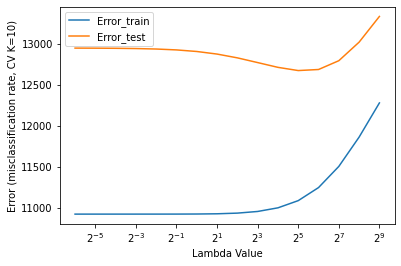

In [11]:
# exercise 6.1.2

from matplotlib.pyplot import figure, plot, xlabel, ylabel, legend, show, boxplot, semilogx, xscale
from scipy.io import loadmat
from sklearn import model_selection, tree
import numpy as np

X_lin_regr = features_regr.to_numpy()
Y_lin_regr = response_regr.to_numpy()
N, M = X_lin_regr.shape

# store the predicted values in arrays
lin_predictions_test = []
ann_predictions_test = []
baseline_reg_predictions_test = []
test_reg_true_values = []

# Add offset attribute
X_lin_regr = np.concatenate((np.ones((X_lin_regr.shape[0],1)),X_lin_regr),1)
M = M+1

K = 10

# Values of lambda
lambdas = np.power(2.,range(-6,10))
#lambdas = np.arange(1, 1000, 10)

# Initialize variables
#T = len(lambdas)
w = np.empty((M,K))
mu = np.empty((K, M-1))
sigma = np.empty((K, M-1))
w_noreg = np.empty((M,K))

# K-fold crossvalidation
K = 10
CV = model_selection.KFold(n_splits=K,shuffle=False)

# Initialize variable
Error_train = np.empty((len(lambdas),K))
Error_test = np.empty((len(lambdas),K))
Error_train_base = np.empty((1,K))
Error_test_base = np.empty((len(lambdas),K))

k=0
for train_index, test_index in CV.split(X_lin_regr):
    # extract training and test set for current CV fold
    X_train = X_lin_regr[train_index]
    y_train = Y_lin_regr[train_index]
    X_test = X_lin_regr[test_index]
    y_test = Y_lin_regr[test_index] 

    # Standardize outer fold based on training set, and save the mean and standard
    # deviations since they're part of the model (they would be needed for
    # making new predictions) - for brevity we won't always store these in the scripts
    mu[k, 1:7] = np.mean(X_train[:, 1:7], 0)
    sigma[k, 1:7] = np.std(X_train[:, 1:7], 0)
    
    X_train[:, 1:7] = (X_train[:, 1:7] - mu[k, 1:7] ) / sigma[k, 1:7]
    X_test[:, 1:7] = (X_test[:, 1:7] - mu[k, 1:7] ) / sigma[k, 1:7]
    
    Xty = X_train.T @ y_train
    XtX = X_train.T @ X_train

    for i, lambdaValue in enumerate(lambdas):   
        # Estimate weights for the optimal value of lambda, on entire training set
        lambdaI = lambdaValue * np.eye(M)
        lambdaI[0,0] = 0 # Do no regularize the bias term
        w[:,k] = np.linalg.solve(XtX+lambdaI,Xty).squeeze()

        if lambdaValue == 32 and k == K-1:
          print(k)
          print("coefficient values for lambda at 32")
          for m in range(M):
              print('{:>15}'.format(np.round(w[m,-1],2)))
        # Compute mean squared error with regularization with optimal lambda
        Error_train[i,k] = np.square(y_train-X_train @ w[:,k]).sum(axis=0)/y_train.shape[0]
        Error_test[i,k] = np.square(y_test-X_test @ w[:,k]).sum(axis=0)/y_test.shape[0]
    k+=1

# f = figure()
# boxplot(Error_test.T)
# xlabel('Model complexity (lambda)')
# ylabel('Test error across CV folds, K={0})'.format(K))

# f = figure()
plot(lambdas, Error_train.mean(1))
plot(lambdas, Error_test.mean(1))
xscale('log', basex=2)
xlabel('Lambda Value')
ylabel('Error (misclassification rate, CV K={0})'.format(K))
legend(['Error_train','Error_test'])

print(lambdas)
print(Error_test.mean(1))
print(np.argmin(Error_test.mean(1)))
    
show()

Baseline Linear Regression

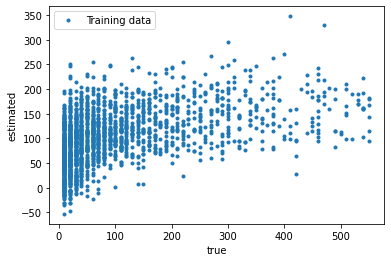

In [215]:
import sklearn.linear_model as lm
# Fit ordinary least squares regression model
model = lm.LinearRegression(fit_intercept=False)
model = model.fit(X_lin_regr,Y_lin_regr)
# Compute model output:
y_est = model.predict(X_lin_regr)
# Plot original data and the model output
f = figure()

plot(Y_lin_regr,y_est,'.')
xlabel('true'); ylabel('estimated')
legend(['Training data', 'Data generator', 'Regression fit (model)'])

show()

Regression b part 1

In [216]:
# exercise 8.1.1

from matplotlib.pylab import (figure, semilogx, loglog, xlabel, ylabel, legend, 
                           title, subplot, show, grid)
import numpy as np
from scipy.io import loadmat
import sklearn.linear_model as lm
from sklearn import model_selection
from toolbox_02450 import rlr_validate

def linear_regression_validate(X,y,lambdas,cvf=10):
    CV = model_selection.KFold(cvf, shuffle=False)
    M = X.shape[1]
    w = np.empty((M,cvf,len(lambdas)))
    train_error = np.empty((cvf,len(lambdas)))
    test_error = np.empty((cvf,len(lambdas)))
    f = 0
    y = y.squeeze()
    for train_index, test_index in CV.split(X,y):
        X_train = X[train_index]
        y_train = y[train_index]
        X_test = X[test_index]
        y_test = y[test_index]
        
        # Standardize the training and set set based on training set moments
        mu[f, 1:7] = np.mean(X_train[:, 1:7], 0)
        sigma[f, 1:7] = np.std(X_train[:, 1:7], 0)
        
        X_train[:, 1:7] = (X_train[:, 1:7] - mu[f, 1:7] ) / sigma[f, 1:7]
        X_test[:, 1:7] = (X_test[:, 1:7] - mu[f, 1:7] ) / sigma[f, 1:7]
        
        # precompute terms
        Xty = X_train.T @ y_train
        XtX = X_train.T @ X_train
        for l in range(0,len(lambdas)):
            # Compute parameters for current value of lambda and current CV fold
            # note: "linalg.lstsq(a,b)" is substitue for Matlab's left division operator "\"
            lambdaI = lambdas[l] * np.eye(M)
            lambdaI[0,0] = 0 # remove bias regularization
            w[:,f,l] = np.linalg.solve(XtX+lambdaI,Xty).squeeze()
            # Evaluate training and test performance
            train_error[f,l] = np.power(y_train-X_train @ w[:,f,l].T,2).mean(axis=0)
            test_error[f,l] = np.power(y_test-X_test @ w[:,f,l].T,2).mean(axis=0)
    
        f=f+1

    opt_val_err = np.min(np.mean(test_error,axis=0))
    opt_lambda = lambdas[np.argmin(np.mean(test_error,axis=0))]
    train_err_vs_lambda = np.mean(train_error,axis=0)
    test_err_vs_lambda = np.mean(test_error,axis=0)
    mean_w_vs_lambda = np.squeeze(np.mean(w,axis=1))
    
    return opt_val_err, opt_lambda, mean_w_vs_lambda, train_err_vs_lambda, test_err_vs_lambda

## Crossvalidation
# Create crossvalidation partition for evaluation
K = 10
CV = model_selection.KFold(K, shuffle=False)
#CV = model_selection.KFold(K, shuffle=False)

# Values of lambda
lambdas = np.power(2.,range(-6,10))

# Initialize variables
#T = len(lambdas)
Error_train_rlr = np.empty((K,1))
Error_test_rlr = np.empty((K,1))
Error_train_nofeatures = np.empty((K,1))
Error_test_nofeatures = np.empty((K,1))
w_rlr = np.empty((M,K))
mu = np.empty((K, M-1))
sigma = np.empty((K, M-1))
w_noreg = np.empty((M,K))

k=0
for train_index, test_index in CV.split(X_lin_regr, Y_lin_regr):
    
    # extract training and test set for current CV fold
    X_train = X_lin_regr[train_index]
    y_train = Y_lin_regr[train_index]
    X_test = X_lin_regr[test_index]
    y_test = Y_lin_regr[test_index]
    internal_cross_validation = 10    
    
    opt_val_err, opt_lambda, mean_w_vs_lambda, train_err_vs_lambda, test_err_vs_lambda = linear_regression_validate(X_train, y_train, lambdas, internal_cross_validation)

    mu[k, 1:7] = np.mean(X_train[:, 1:7], 0)
    sigma[k, 1:7] = np.std(X_train[:, 1:7], 0)
    
    X_train[:, 1:7] = (X_train[:, 1:7] - mu[k, 1:7] ) / sigma[k, 1:7]
    X_test[:, 1:7] = (X_test[:, 1:7] - mu[k, 1:7] ) / sigma[k, 1:7]

    # Standardize outer fold based on training set, and save the mean and standard
    # deviations since they're part of the model (they would be needed for
    # making new predictions) - for brevity we won't always store these in the scripts 
    
    Xty = X_train.T @ y_train
    XtX = X_train.T @ X_train

    # Estimate weights for the optimal value of lambda, on entire training set
    lambdaI = opt_lambda * np.eye(M)
    lambdaI[0,0] = 0 # Do no regularize the bias term
    w_rlr[:,k] = np.linalg.solve(XtX+lambdaI,Xty).squeeze()

    lin_predictions_test.append(X_test @ w_rlr[:,k])
    test_reg_true_values.append(y_test)

    # Compute mean squared error with regularization with optimal lambda
    Error_train_rlr[k] = np.square(y_train-X_train @ w_rlr[:,k]).sum(axis=0)/y_train.shape[0]
    Error_test_rlr[k] = np.square(y_test-X_test @ w_rlr[:,k]).sum(axis=0)/y_test.shape[0]

    Error_test_nofeatures[k] = np.square(y_test-y_test.mean()).sum(axis=0)/y_test.shape[0]

    dummy_clf = DummyRegressor(strategy="mean") #use uniform strategy
    dummy_clf.fit(X_train,y_train)
    y_test_predict_baseline_reg = dummy_clf.predict(X_test)
    baseline_reg_predictions_test.append(y_test_predict_baseline_reg)
    
    print(k, opt_lambda)

    k+=1
print(Error_test_rlr)
print(Error_test_nofeatures)

0 16.0
1 64.0
2 16.0
3 32.0
4 32.0
5 32.0
6 32.0
7 16.0
8 16.0
9 8.0
[[21671.62215619]
 [18212.24487289]
 [18753.59140676]
 [18676.96037174]
 [16692.10652017]
 [11284.60496809]
 [ 5242.41876256]
 [ 4688.76138118]
 [ 4638.67985545]
 [ 8581.05713506]]
[[16194.53863422]
 [22243.47530718]
 [22544.69517958]
 [22418.40441871]
 [18468.900638  ]
 [14470.88846881]
 [ 6712.46455577]
 [ 4318.2716713 ]
 [ 2157.54426827]
 [  670.20215593]]


Import for baseline model

In [217]:
# X_train_regr, X_test_regr, y_train_regr, y_test_regr = train_test_split(features_regr, response_regr, test_size=0.25, random_state=1)

**Baseline model**

In [218]:
# dummy_clf = DummyRegressor(strategy="mean") #use uniform strategy
# dummy_clf.fit(X_train,y_train)
# y_test_predict = dummy_clf.predict(X_test_regr)
# dummy_clf.score(X_test_regr,y_test_regr)

ANN

In [219]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.io import loadmat
import torch
from sklearn import model_selection
from toolbox_02450 import train_neural_net, draw_neural_net
from scipy import stats

K1 = 10
K2 = 10
M = 42

CV1 = model_selection.KFold(n_splits=K1,shuffle=False)
CV2 = model_selection.KFold(n_splits=K2,shuffle=False)

# Parameters for NN
n_hidden_units = [25]    # number of hidden units
#n_hidden_units = [1,5,10,25]
n_replicates = 1
max_iter = 10000

#features_regr[0:6]=(features_regr[0:6]-features_regr[0:6].mean())/features_regr[0:6].std()

X = features_regr.to_numpy()
y = response_regr.to_numpy()

y = y.reshape([1837,1])
errors = []
print("X shape: ", np.shape(X), "Y shape: ", np.shape(y))

for i, (par_index, test_index) in enumerate(CV1.split(X,y)):

    mu[i, 0:6] = np.mean(X[:, 0:6], 0)
    sigma[i, 0:6] = np.std(X[:, 0:6], 0)
    
    X[:, 0:6] = (X[:, 0:6] - mu[i, 0:6] ) / sigma[i, 0:6]
    
    X_par, X_test, y_par, y_test = torch.Tensor(X[par_index,:]), torch.Tensor(X[test_index,:]), torch.Tensor(y[par_index]), torch.Tensor(y[test_index])

    e_gen_lvl3 = []
    errors_matrix = np.zeros((len(n_hidden_units),K2))
    nets = np.zeros((len(n_hidden_units),K2))
    
    for j, (train_index, val_index) in enumerate(CV2.split(X_par,y_par)):
        X_train, X_val,y_train,y_val = torch.Tensor(X_par[train_index,:]), torch.Tensor(X_par[val_index,:]), torch.Tensor(y_par[train_index]), torch.Tensor(y_par[val_index])        
        for n in range(0,len(n_hidden_units)):

            print("N = ",n," J = ", j, "I = ", i)
            
            model = lambda: torch.nn.Sequential(
                    torch.nn.Linear(M, n_hidden_units[n]), #M features to n_hidden_units
                    torch.nn.Tanh(),   # 1st transfer function,
                    torch.nn.Linear(n_hidden_units[n], 1), # n_hidden_units to 1 output neuron
                    # no final tranfer function, i.e. "linear output"
                    )
            loss_fn = torch.nn.MSELoss() # notice how this is now a mean-squared-error loss
            net, final_loss, learning_curve = train_neural_net(model,
                                                       loss_fn,
                                                       X=X_train,
                                                       y=y_train,
                                                       n_replicates=n_replicates,
                                                       max_iter = max_iter)
    
            print('\n\tBest loss: {}\n'.format(final_loss))

            y_val_est = net(X_val)
            squared_error = (y_val_est.float()-y_val.float())**2 # squared error
            mean_squared_error = (sum(squared_error).type(torch.float)/len(y_val)).data.numpy() #mean
            errors_matrix[n][j] = mean_squared_error

        e_gen_lvl3 = np.sum(errors_matrix, axis=1)
        e_gen_lvl3 = e_gen_lvl3 * (len(X_val)/len(X_par))
        min_value = min(e_gen_lvl3)
        e_gen_lvl3 = e_gen_lvl3.tolist()
        index_min = e_gen_lvl3.index(min_value)
        print('Optimal N: ', n_hidden_units[index_min])

        
        model = lambda: torch.nn.Sequential(
                    torch.nn.Linear(M, n_hidden_units[index_min]), 
                    torch.nn.Tanh(),
                    torch.nn.Linear(n_hidden_units[index_min], 1), 
                    # no final tranfer function, i.e. "linear output"
                    )
        loss_fn = torch.nn.MSELoss() # notice how this is now a mean-squared-error loss
            
        net, final_loss, learning_curve = train_neural_net(model,
                                                       loss_fn,
                                                       X=X_par,
                                                       y=y_par,
                                                       n_replicates=n_replicates,
                                                       max_iter = max_iter)
        print('\n\tBest loss outter loop: {}\n'.format(final_loss))
        y_test_est = net(X_test)
        # Determine errors
        squared_error = (y_test_est.float()-y_test.float())**2 # squared error
        mean_squared_error = (sum(squared_error).type(torch.float)/len(y_test)).data.numpy() #mean
        errors.append(mean_squared_error)
        y_test_est = y_test_est.detach().numpy()
        ann_predictions_test.append(y_test_est)
        print("OUTTER FOLDER:", i, "OUTTER MSE: ", mean_squared_error)


errors_array = np.array(errors)
e_gen = errors_array.sum() * (len(X_test)/(len(X_par)+len(X_train)))
print("ERROR TEST: ", errors, "GENERALIZED ERROR: ", e_gen)

X shape:  (1837, 42) Y shape:  (1837, 1)
N =  0  J =  0 I =  0

	Replicate: 1/1
		Iter	Loss			Rel. loss
		1000	17247.402	0.00019281342
		2000	14657.049	0.0001439613
		3000	12892.584	0.00011428775
		4000	11601.02	0.000101004625
		5000	10501.582	9.6144424e-05
		6000	9557.898	9.603373e-05
		7000	8735.623	8.562444e-05
		8000	8054.372	7.468212e-05
		9000	7517.2446	6.436608e-05
		10000	7115.5527	4.6591955e-05
		Final loss:
		10000	7115.5527	4.6591955e-05

	Best loss: 7115.552734375

Optimal N:  25

	Replicate: 1/1
		Iter	Loss			Rel. loss
		1000	18425.34	0.000186317
		2000	15773.397	0.00014225353
		3000	13909.186	0.00011393768
		4000	12477.087	0.000103147206
		5000	11260.694	0.00010206269
		6000	10239.087	9.222003e-05
		7000	9370.227	8.576548e-05
		8000	8711.479	6.411747e-05
		9000	8229.05	5.4111766e-05
		10000	7804.512	5.1987954e-05
		Final loss:
		10000	7804.512	5.1987954e-05

	Best loss outter loop: 7804.51220703125

OUTTER FOLDER: 0 OUTTER MSE:  [22499.97]
N =  0  J =  1 I =  0

	Replicat

Regression Statistical Analysis

In [230]:
import scipy.stats
import numpy as np, scipy.stats as st
alpha = 0.05

# for i, (par_index, test_index) in enumerate(CV1.split(X,y)):
#   print(test_index)

#ann_predictions_test = np.concatenate(ann_predictions_test)

temp1 = np.arange(184, 1840, 1)
temp2 = np.arange(2024, 3680, 1)
temp3 = np.arange(3864, 5520, 1)
temp4 = np.arange(5704, 7360, 1)
temp5 = np.arange(7544, 9200, 1)
temp6 = np.arange(9384, 11040, 1)
temp7 = np.arange(11224, 12880, 1)
temp8 = np.arange(13063, 14710, 1)
temp9 = np.arange(14893, 16540, 1)
temp10 = np.arange(16723, 18370, 1)


temp11 = np.concatenate((temp1, temp2, temp3, temp4, temp5, temp6, temp7, temp8 , temp9, temp10))
print(temp11)

#ann_predictions_test = np.delete(ann_predictions_test, temp11)


#lin_predictions_test = np.concatenate(lin_predictions_test)
#ann_predictions_test = np.concatenate(ann_predictions_test)
#baseline_reg_predictions_test = np.concatenate(baseline_reg_predictions_test)
#test_reg_true_values = np.concatenate(test_reg_true_values)

# Linear to ANN
print('Linear to ANN')
zA = np.abs(test_reg_true_values - lin_predictions_test) ** 2
zB = np.abs(test_reg_true_values - ann_predictions_test) ** 2
print('Confidence interval Linear Regression')
CIA = st.t.interval(1-alpha, df=len(zA)-1, loc=np.mean(zA), scale=st.sem(zA))
print(CIA)
print('Confidence interval ANN')
CIB = st.t.interval(1-alpha, df=len(zB)-1, loc=np.mean(zB), scale=st.sem(zB))
print(CIB)

z=zA-zB
print('z value')
print(z.mean())
print('Confidence Interval')
CI = st.t.interval(1-alpha, df=len(z)-1, loc=np.mean(z), scale=st.sem(z))
print(CI)
p = 2*st.t.cdf(-np.abs(np.mean(z))/st.sem(z), df=len(z)-1)
print('p-value')
print(p)
print('\n')

# Linear to Baseline
print('Linear to Baseline')
zA = np.abs(test_reg_true_values- lin_predictions_test) ** 2
zB = np.abs(test_reg_true_values- baseline_reg_predictions_test) ** 2
print('Confidence Interval Linear Regression')
CIA = st.t.interval(1-alpha, df=len(zA)-1, loc=np.mean(zA), scale=st.sem(zA))
print(CIA)
print('Confidence Interval Baseline')
CIB = st.t.interval(1-alpha, df=len(zB)-1, loc=np.mean(zB), scale=st.sem(zB))
print(CIB)

z=zA-zB
print('Z value')
print(z.mean())
print('Confidence Interval')
CI = st.t.interval(1-alpha, df=len(z)-1, loc=np.mean(z), scale=st.sem(z))
print(CI)
print('p-value')
p = 2*st.t.cdf(-np.abs(np.mean(z))/st.sem(z), df=len(z)-1)
print(p)
print('\n')

# ANN to Baseline
print('ANN to Baseline')
zA = np.abs(test_reg_true_values- ann_predictions_test) ** 2
zB = np.abs(test_reg_true_values- baseline_reg_predictions_test) ** 2
print('Confidence interval ANN')
CIA = st.t.interval(1-alpha, df=len(zA)-1, loc=np.mean(zA), scale=st.sem(zA))
print(CIA)
print('Confidence interval Baseline')
CIB = st.t.interval(1-alpha, df=len(zB)-1, loc=np.mean(zB), scale=st.sem(zB))
print(CIB)

z=zA-zB
print('Z value')
print(z.mean())
print('Confidence interval')
CI = st.t.interval(1-alpha, df=len(z)-1, loc=np.mean(z), scale=st.sem(z))
print(CI)
print('p-value')
p = 2*st.t.cdf(-np.abs(np.mean(z))/st.sem(z), df=len(z)-1)
print(p)

[  184   185   186 ... 18367 18368 18369]
1837
Linear to ANN
Confidence interval Linear Regression
(11381.637645941311, 14329.225967304694)
Confidence interval ANN
(11240.232183142958, 13687.182745239403)
z value
391.72434243182056
Confidence Interval
(-541.7001432101493, 1325.1488280737904)
p-value
0.41057606313977535


Linear to Baseline
Confidence Interval Linear Regression
(11381.637645941311, 14329.225967304694)
Confidence Interval Baseline
(13037.626096424108, 15823.228913409737)
Z value
-1574.99569829392
Confidence Interval
(-2530.867779743117, -619.123616844723)
p-value
0.0012529080524917562


ANN to Baseline
Confidence interval ANN
(11240.232183142958, 13687.182745239403)
Confidence interval Baseline
(13037.626096424108, 15823.228913409737)
Z value
-1966.7200407257405
Confidence interval
(-2575.175495197768, -1358.2645862537129)
p-value
2.8957583256261364e-10


# CLASSIFICATION

First, we will turn the variable we want to predict into a class, where if the score of a game is over the mean of the whole dataset, we consider it as a good score and if not we consider it as a bad score.

In [ ]:
mean = data_csv['Critic_Score'].mean()
for i in data_csv.index:
    data_csv.at[i, 'Critic_Score'] = 1 if data_csv.at[i, 'Critic_Score'] > mean else 0
features_class, response_class = data_csv.drop('Critic_Score', axis=1),data_csv['Critic_Score']

Combined model generation thing with two-level cross validation

Logistic Regression Statistic
0 16.0
Training error: 0.2383545069570478
Test error:     0.13043478260869565
KNN statistic
0 61
Training error: 0.249848759830611
Test error:     0.13043478260869565
Baseline statistic
Test error:     0.13043478260869565
Logistic Regression Statistic
1 32.0
Training error: 0.249848759830611
Test error:     0.20108695652173914
KNN statistic
1 151
Training error: 0.25650332728372655
Test error:     0.22282608695652173
Baseline statistic
Test error:     0.23369565217391305
Logistic Regression Statistic
2 8.0
Training error: 0.2365396249243799
Test error:     0.25
KNN statistic
2 131
Training error: 0.24924379915305506
Test error:     0.32608695652173914
Baseline statistic
Test error:     0.2554347826086957
Logistic Regression Statistic
3 8.0
Training error: 0.23774954627949182
Test error:     0.22282608695652173
KNN statistic
3 91
Training error: 0.2516636418632789
Test error:     0.29347826086956524
Baseline statistic
Test error:     0.3532608695652174
Logi

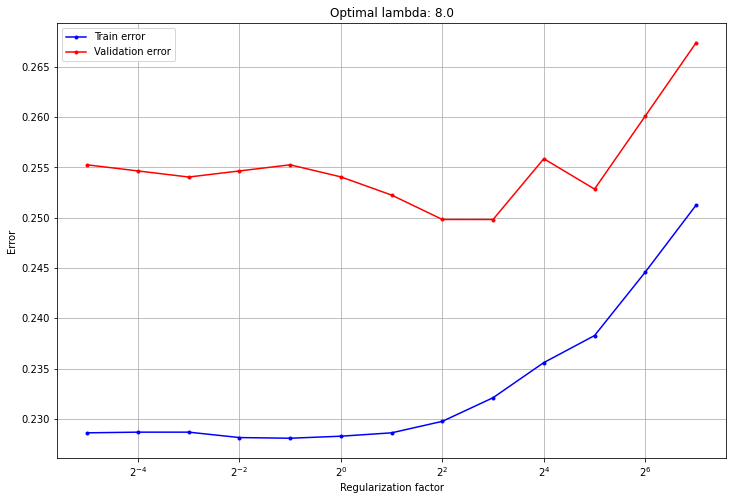

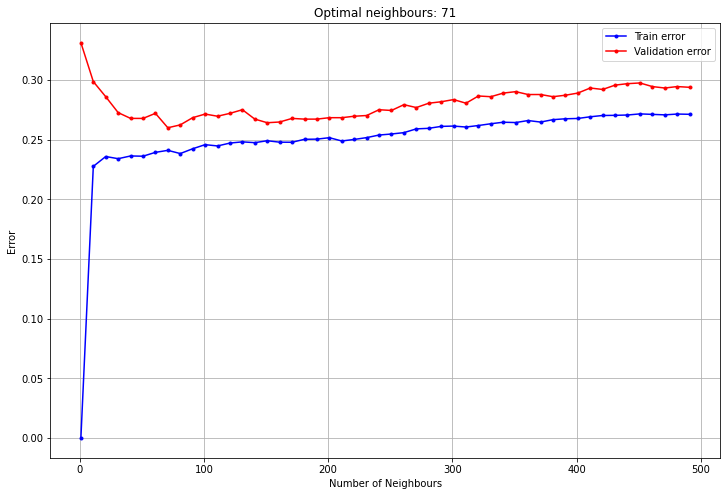

In [ ]:
from matplotlib.pylab import (figure, semilogx, loglog, xlabel, ylabel, legend, 
                           title, subplot, show, grid, plot, xscale)
import numpy as np
from scipy.io import loadmat
import sklearn.linear_model as lm
from sklearn import model_selection

X_log_regr = features_class.to_numpy()
attributeNames = features_class.columns.to_numpy()
classNames = np.array(['Bad', 'Good'])
Y_log_regr = response_class.to_numpy()
N, M = X_log_regr.shape

def KNN_regression_validate(X,y,lambdas,cvf=10):
    CV = model_selection.KFold(cvf, shuffle=False)
    M = X.shape[1]
    w = np.empty((M,cvf,len(lambdas)))
    train_error = np.empty((cvf,len(lambdas)))
    test_error = np.empty((cvf,len(lambdas)))
    f = 0
    y = y.squeeze()
    for train_index, test_index in CV.split(X,y):
        X_train = X[train_index]
        y_train = y[train_index]
        X_test = X[test_index]
        y_test = y[test_index]
        
        # Standardize the training and set set based on training set moments
        mu[f, 0:6] = np.mean(X_train[:, 0:6], 0)
        sigma[f, 0:6] = np.std(X_train[:, 0:6], 0)
        
        X_train[:, 0:6] = (X_train[:, 0:6] - mu[f, 0:6] ) / sigma[f, 0:6]
        X_test[:, 0:6] = (X_test[:, 0:6] - mu[f, 0:6] ) / sigma[f, 0:6]
        
        for l in range(0, len(lambdas)):
          knclassifier = KNeighborsClassifier(n_neighbors=lambdas[l])
          knclassifier.fit(X_train, y_train)
          y_train_est = knclassifier.predict(X_train)
          y_test_est = knclassifier.predict(X_test)
          
          # MEASURE FOR ERROR IS # OF ERRORS/NUMBER OF TEST VALUES (which is done here)
          train_error[f,l] = np.sum(y_train_est != y_train) / len(y_train)
          test_error[f,l] = np.sum(y_test_est != y_test) / len(y_test)
    
        f=f+1

    opt_val_err = np.min(np.mean(test_error,axis=0))
    opt_lambda = lambdas[np.argmin(np.mean(test_error,axis=0))]
    train_err_vs_lambda = np.mean(train_error,axis=0)
    test_err_vs_lambda = np.mean(test_error,axis=0)
    mean_w_vs_lambda = np.squeeze(np.mean(w,axis=1))
    
    return opt_val_err, opt_lambda, mean_w_vs_lambda, train_err_vs_lambda, test_err_vs_lambda

def logistic_regression_validate(X,y,lambdas,cvf=10):
    CV = model_selection.KFold(cvf, shuffle=False)
    M = X.shape[1]
    w = np.empty((M,cvf,len(lambdas)))
    train_error = np.empty((cvf,len(lambdas)))
    test_error = np.empty((cvf,len(lambdas)))
    f = 0
    y = y.squeeze()
    for train_index, test_index in CV.split(X,y):
        X_train = X[train_index]
        y_train = y[train_index]
        X_test = X[test_index]
        y_test = y[test_index]

        
        # Standardize the training and set set based on training set moments
        mu[f, 0:6] = np.mean(X_train[:, 0:6], 0)
        sigma[f, 0:6] = np.std(X_train[:, 0:6], 0)
        
        X_train[:, 0:6] = (X_train[:, 0:6] - mu[f, 0:6] ) / sigma[f, 0:6]
        X_test[:, 0:6] = (X_test[:, 0:6] - mu[f, 0:6] ) / sigma[f, 0:6]
        
        for l in range(0, len(lambdas)):
          mdl = LogisticRegression(penalty='l2', C=1/lambdas[l], max_iter=1000)
          
          mdl.fit(X_train, y_train)

          y_train_est = mdl.predict(X_train).T
          y_test_est = mdl.predict(X_test).T
          
          # MEASURE FOR ERROR IS # OF ERRORS/NUMBER OF TEST VALUES (which is done here)
          train_error[f,l] = np.sum(y_train_est != y_train) / len(y_train)
          test_error[f,l] = np.sum(y_test_est != y_test) / len(y_test)
    
        f=f+1

    opt_val_err = np.min(np.mean(test_error,axis=0))
    opt_lambda = lambdas[np.argmin(np.mean(test_error,axis=0))]
    train_err_vs_lambda = np.mean(train_error,axis=0)
    test_err_vs_lambda = np.mean(test_error,axis=0)
    mean_w_vs_lambda = np.squeeze(np.mean(w,axis=1))
    
    return opt_val_err, opt_lambda, mean_w_vs_lambda, train_err_vs_lambda, test_err_vs_lambda

## Crossvalidation
# Create crossvalidation partition for evaluation
K = 10
CV = model_selection.KFold(K, shuffle=False)
#CV = model_selection.KFold(K, shuffle=False)

# Values of lambda
lambdas_interval = np.power(2.,range(-5,8))
neighbours_interval = np.arange(1, 501, 10)

train_error_rate_class = np.zeros(K)
test_error_rate_class = np.zeros(K)
train_error_rate_class_KNN = np.zeros(K)
test_error_rate_class_KNN = np.zeros(K)
test_error_rate_class_baseline = np.zeros(K)

w_est = np.empty((M,K))
log_predictions_test = []
knn_predictions_test = []
baseline_predictions_test = []
test_true_values = []

k=0
for train_index, test_index in CV.split(X_log_regr, Y_log_regr):
    
    # extract training and test set for current CV fold
    X_train = X_log_regr[train_index]
    y_train = Y_log_regr[train_index]
    X_test = X_log_regr[test_index]
    y_test = Y_log_regr[test_index]
    internal_cross_validation = 10
    
    opt_val_err, opt_lambda, mean_w_vs_lambda, train_err_vs_lambda, test_err_vs_lambda = logistic_regression_validate(X_train, y_train, lambdas_interval, internal_cross_validation)

    mu[k, 0:6] = np.mean(X_train[:, 0:6], 0)
    sigma[k, 0:6] = np.std(X_train[:, 0:6], 0)
    
    X_train[:, 0:6] = (X_train[:, 0:6] - mu[k, 0:6] ) / sigma[k, 0:6]
    X_test[:, 0:6] = (X_test[:, 0:6] - mu[k, 0:6] ) / sigma[k, 0:6]

    # logistic regression part
    mdl = LogisticRegression(penalty='l2', C=1/opt_lambda, max_iter=1000)
    
    mdl.fit(X_train, y_train)

    y_train_est = mdl.predict(X_train).T
    y_test_est = mdl.predict(X_test).T
    log_predictions_test.append(y_test_est)
    test_true_values.append(y_test)
    
    # MEASURE FOR ERROR IS # OF ERRORS/NUMBER OF TEST VALUES (which is done here)
    train_error_rate_class[k] = np.sum(y_train_est != y_train) / len(y_train)
    test_error_rate_class[k] = np.sum(y_test_est != y_test) / len(y_test)

    w_est[:,k] = mdl.coef_[0]
    
    print('Logistic Regression Statistic')
    print(k, opt_lambda)
    print('Training error: {0}'.format(train_error_rate_class[k]))
    print('Test error:     {0}'.format(test_error_rate_class[k]))

        # Display the results for the last cross-validation fold
    if k == K-1:
        figure(k, figsize=(12,8))
        title('Optimal lambda: {0}'.format(opt_lambda))
        plot(lambdas_interval,train_err_vs_lambda.T,'b.-',lambdas_interval,test_err_vs_lambda.T,'r.-')
        xscale('log', basex=2)
        xlabel('Regularization factor')
        ylabel('Error')
        legend(['Train error','Validation error'])
        grid()

    # KNN section
    opt_val_err, opt_lambda, mean_w_vs_lambda, train_err_vs_lambda, test_err_vs_lambda = KNN_regression_validate(X_train, y_train, neighbours_interval, internal_cross_validation)

    knclassifier = KNeighborsClassifier(n_neighbors=opt_lambda)
    knclassifier.fit(X_train, y_train)
    y_train_est_knn = knclassifier.predict(X_train)
    y_test_est_knn = knclassifier.predict(X_test)
    knn_predictions_test.append(y_test_est_knn)

    train_error_rate_class_KNN[k] = np.sum(y_train_est_knn != y_train) / len(y_train)
    test_error_rate_class_KNN[k] = np.sum(y_test_est_knn != y_test) / len(y_test)

    print('KNN statistic')
    print(k, opt_lambda)
    print('Training error: {0}'.format(train_error_rate_class_KNN[k]))
    print('Test error:     {0}'.format(test_error_rate_class_KNN[k]))

    # Display the results for the last cross-validation fold
    if k == K-1:
        figure(k+1, figsize=(12,8))
        title('Optimal neighbours: {0}'.format(opt_lambda))
        plot(neighbours_interval,train_err_vs_lambda.T,'b.-',neighbours_interval,test_err_vs_lambda.T,'r.-')
        xlabel('Number of Neighbours')
        ylabel('Error')
        legend(['Train error','Validation error'])
        grid()

    # Baseline model
    dummy_clf = DummyClassifier(strategy='most_frequent') #use most_frequent strategy
    dummy_clf.fit(X_train,y_train)
    y_test_predict_baseline = dummy_clf.predict(X_test)
    baseline_predictions_test.append(y_test_predict_baseline)
    test_error_rate_class_baseline[k] = np.sum(y_test_predict_baseline != y_test) / len(y_test)

    print('Baseline statistic')
    print('Test error:     {0}'.format(test_error_rate_class_baseline[k]))

    k+=1

opt_fold_idx_regression = np.argmin(test_error_rate_class)
print('index for the fold with lowest error for regression: {0}', opt_fold_idx_regression)
print(w_est[:, opt_fold_idx_regression])

# print(knn_predictions_test)
# print(log_predictions_test)
# print(test_true_values)

Statistical Comparison

In [ ]:
from toolbox_02450 import mcnemar
alpha = 0.05

log_predictions_test = np.concatenate(log_predictions_test)
knn_predictions_test = np.concatenate(knn_predictions_test)
baseline_predictions_test = np.concatenate(baseline_predictions_test)
test_true_values = np.concatenate(test_true_values)

# Logistic to KNN
print("Logistic to KNN")
[thetahat, CI, p] = mcnemar(test_true_values, log_predictions_test, knn_predictions_test, alpha = alpha)
print("theta = theta_A-theta_B point estimate", thetahat, " CI: ", CI, "p-value", p)
print("\n")

# Logistic to Baseline
print("Logistic to Baseline")
[thetahat, CI, p] = mcnemar(test_true_values, log_predictions_test, baseline_predictions_test, alpha = alpha)
print("theta = theta_A-theta_B point estimate", thetahat, " CI: ", CI, "p-value", p)
print("\n")

# KNN to Baseline
print("KNN to Baseline")
[thetahat, CI, p] = mcnemar(test_true_values, knn_predictions_test, baseline_predictions_test, alpha = alpha)
print("theta = theta_A-theta_B point estimate", thetahat, " CI: ", CI, "p-value", p)
print("\n")

Logistic to KNN
Result of McNemars test using alpha= 0.05
Comparison matrix n
[[1228.  142.]
 [  90.  377.]]
Approximate 1-alpha confidence interval of theta: [thetaL,thetaU] =  (0.012108528474162883, 0.04449818753173629)
p-value for two-sided test A and B have same accuracy (exact binomial test): p= 0.0007771346459499484
theta = theta_A-theta_B point estimate 0.028307022318998367  CI:  (0.012108528474162883, 0.04449818753173629) p-value 0.0007771346459499484


Logistic to Baseline
Result of McNemars test using alpha= 0.05
Comparison matrix n
[[812. 558.]
 [187. 280.]]
Approximate 1-alpha confidence interval of theta: [thetaL,thetaU] =  (0.17427085584191415, 0.22949023767715193)
p-value for two-sided test A and B have same accuracy (exact binomial test): p= 1.0901363430218254e-43
theta = theta_A-theta_B point estimate 0.20195971692977682  CI:  (0.17427085584191415, 0.22949023767715193) p-value 1.0901363430218254e-43


KNN to Baseline
Result of McNemars test using alpha= 0.05
Comparison

**Dummy Classifier**: we will label all of the predictions as the main class

In [ ]:
# dummy_clf = DummyClassifier() #use uniform strategy
# dummy_clf.fit(X_train,y_train)
# y_test_predict = dummy_clf.predict(X_test)
# dummy_modelscore = dummy_clf.score(X_test,y_test)
# print(dummy_modelscore)
# print(metrics.confusion_matrix(y_test, y_test_predict))
# print(metrics.classification_report(y_test, y_test_predict))

**Logistic Regression**

In [ ]:
# LR_model = LogisticRegression(random_state=1,max_iter=1000)
# LR_model.fit(X_train,y_train)
# y_test_predict = None
# y_test_predict = LR_model.predict(X_test)
# model_scoreLR = LR_model.score(X_test, y_test)
# print(model_scoreLR)
# print(metrics.confusion_matrix(y_test, y_test_predict))
# print(metrics.classification_report(y_test, y_test_predict))

In [ ]:
# from numpy import mean
# from numpy import std
# from sklearn.datasets import make_classification
# from sklearn.model_selection import KFold
# from sklearn.model_selection import GridSearchCV
# from sklearn.metrics import accuracy_score
# from sklearn.datasets import make_classification

# cv_outer = KFold(n_splits=10, shuffle=True, random_state=1)

# outer_results = list()
# for train_ix, test_ix in cv_outer.split(features):
# 	# split data
#   X_train, X_test = features.iloc[train_ix, :], features.iloc[test_ix, :]
#   y_train, y_test = response.iloc[train_ix], response.iloc[test_ix]
  
#   # configure the  inner cross-validation
#   cv_inner = KFold(n_splits=10, shuffle=True, random_state=1)
#   model = LogisticRegression(max_iter=10000)
#   # define search space for the hyperparameters we want to optimize
#   space = dict()
#   space['C'] = [0.01, 0.05, 0.1, 0.5, 1, 5, 10, 20, 50, 100]
#   search = GridSearchCV(model, space, scoring='accuracy', cv=cv_inner, refit=True)
#   result = search.fit(X_train, y_train)
#   # get the best performing model fit on the whole training set
#   best_model = result.best_estimator_
#   # evaluate model on the hold out dataset
#   yhat = best_model.predict(X_test)
#   # evaluate the model
#   acc = accuracy_score(y_test, yhat)
#   # store the result
#   outer_results.append(acc)
#   # report progress
#   print('>accuracy=%.3f, est=%.3f, parameter_val=%s' % (acc, result.best_score_, result.best_params_))
# # summarize the estimated performance of the model
# print('Accuracy: %.3f, Standard deviation: %.3f' % (mean(outer_results), std(outer_results)))

**K-nearest neighbours**

In [ ]:
# KNN_model=KNeighborsClassifier()
# KNN_model.fit(X_train,y_train)
# y_test_predict = None
# y_test_predict = KNN_model.predict(X_test)
# model_scoreKNN = KNN_model.score(X_test, y_test)
# print(model_scoreKNN)
# print(metrics.confusion_matrix(y_test, y_test_predict))
# print(metrics.classification_report(y_test, y_test_predict))

In [ ]:
# from numpy import mean
# from numpy import std
# from sklearn.datasets import make_classification
# from sklearn.model_selection import KFold
# from sklearn.model_selection import GridSearchCV
# from sklearn.metrics import accuracy_score
# from sklearn.datasets import make_classification

# cv_outer = KFold(n_splits=10, shuffle=True, random_state=1)

# outer_results = list()
# for train_ix, test_ix in cv_outer.split(features):
# 	# split data
#   X_train, X_test = features.iloc[train_ix, :], features.iloc[test_ix, :]
#   y_train, y_test = response.iloc[train_ix], response.iloc[test_ix]
  
#   # configure the  inner cross-validation
#   cv_inner = KFold(n_splits=10, shuffle=True, random_state=1)
#   model = KNeighborsClassifier()
#   # define search space for the hyperparameters we want to optimize
#   space = dict()
#   space['n_neighbors'] = list(range(1,200,10))
#   search = GridSearchCV(model, space, scoring='accuracy', cv=cv_inner, refit=True)
#   result = search.fit(X_train, y_train)
#   # get the best performing model fit on the whole training set
#   best_model = result.best_estimator_
#   # evaluate model on the hold out dataset
#   yhat = best_model.predict(X_test)
#   # evaluate the model
#   acc = accuracy_score(y_test, yhat)
#   # store the result
#   outer_results.append(acc)
#   # report progress
#   print('>accuracy=%.3f, est=%.3f, parameter_val=%s' % (acc, result.best_score_, result.best_params_))
# # summarize the estimated performance of the model
# print('Accuracy: %.3f, Standard deviation: %.3f' % (mean(outer_results), std(outer_results)))